<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Digits_Recognition_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digits recognition (using Multilayer Perceptron)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.13
Tensorflow version: 2.8.0
Keras version: 2.8.0


## Configuring Tensorboard

In [3]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


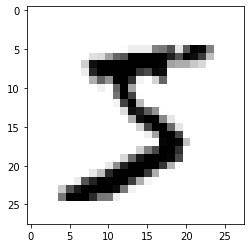

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

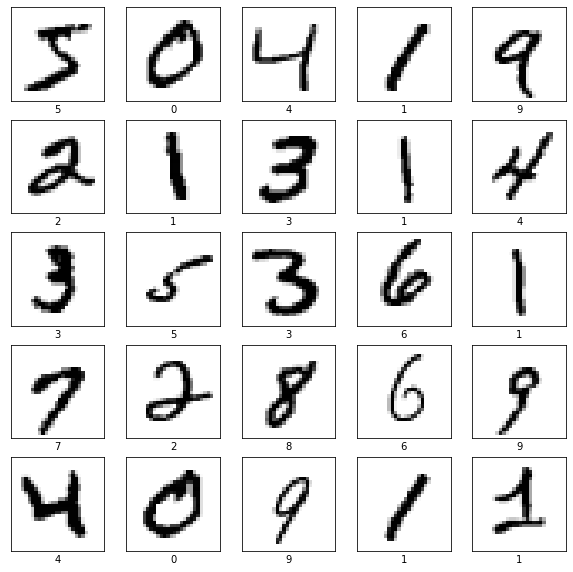

In [9]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

In [10]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [11]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


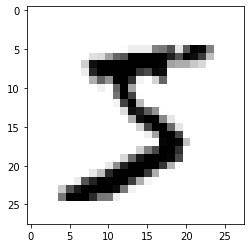

In [12]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

In [13]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


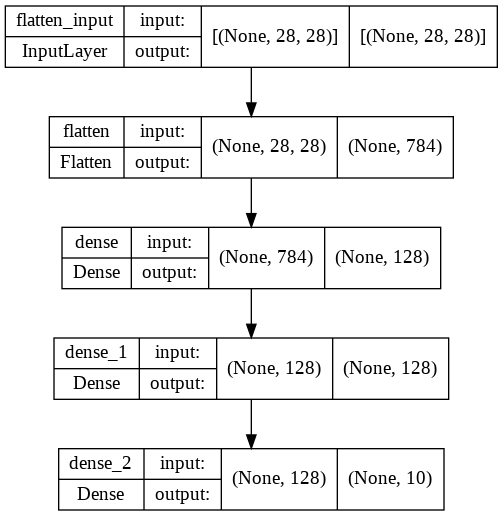

In [15]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compile the model

In [16]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [17]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5176 - accuracy: 0.9225 - val_loss: 0.3290 - val_accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2991 - accuracy: 0.9548 - val_loss: 0.2801 - val_accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9603 - val_loss: 0.2301 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2381 - accuracy: 0.9625 - val_loss: 0.2143 - val_accuracy: 0.9686
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2225 - accuracy: 0.9655 - val_loss: 0.2147 - val_accuracy: 0.9672
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2125 - accuracy: 0.9665 - val_loss: 0.2193 - val_accuracy: 0.9624
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2048 - accuracy: 0.9678 - val_loss: 0.1894 - val_accuracy:

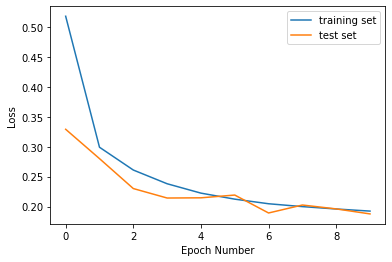

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

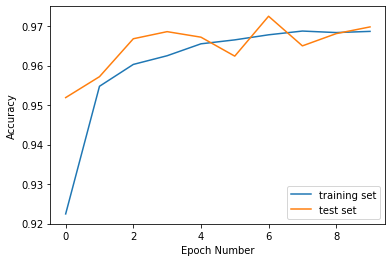

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy


### Training set accuracy

In [20]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [21]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.17736482620239258
Training accuracy:  0.9745833277702332


### Test set accuracy

In [22]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [23]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.18782006204128265
Validation accuracy:  0.9697999954223633


## Save the model

In [24]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [25]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

In [26]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [27]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [28]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,6.579236e-07,1.066117e-05,1.701457e-04,8.416089e-05,3.231077e-07,1.295994e-05,2.801434e-09,9.996831e-01,2.251794e-06,3.581288e-05
1,2.668307e-04,4.247135e-03,9.891465e-01,6.082850e-03,8.850661e-10,1.828324e-05,8.270675e-05,5.490260e-07,1.551309e-04,2.120072e-09
2,2.916135e-06,9.982917e-01,5.359838e-04,7.717878e-05,1.393625e-04,3.912709e-06,1.319337e-04,4.384947e-04,3.720436e-04,6.532272e-06
3,9.991053e-01,2.011037e-06,3.800767e-04,3.805711e-05,9.010643e-06,7.152843e-05,1.215962e-04,2.159712e-04,6.260161e-06,5.024823e-05
4,5.675550e-04,8.376036e-06,8.994745e-05,2.066804e-05,9.519309e-01,6.979721e-05,2.152416e-04,2.644397e-03,1.969994e-05,4.443358e-02
...,...,...,...,...,...,...,...,...,...,...
9995,9.494286e-07,1.101147e-04,9.998754e-01,3.813698e-06,9.696089e-14,5.406591e-09,1.700046e-09,9.076068e-06,5.843316e-07,7.841305e-12
9996,1.154521e-07,3.578405e-05,4.296548e-05,9.985480e-01,3.935375e-09,1.317704e-03,3.053681e-09,7.647178e-07,1.920671e-05,3.560058e-05
9997,7.248386e-08,7.402197e-06,1.931535e-08,1.046736e-07,9.996371e-01,2.052826e-06,9.984851e-07,8.974149e-05,6.788902e-06,2.555593e-04
9998,2.383602e-04,4.929208e-06,3.507392e-06,4.531374e-04,7.188714e-07,9.844615e-01,1.046976e-02,8.861369e-06,4.356125e-03,3.140875e-06


In [29]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [30]:
print(predictions[0])

7


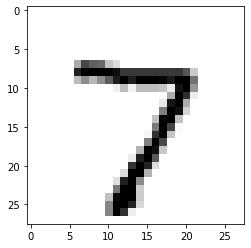

In [31]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

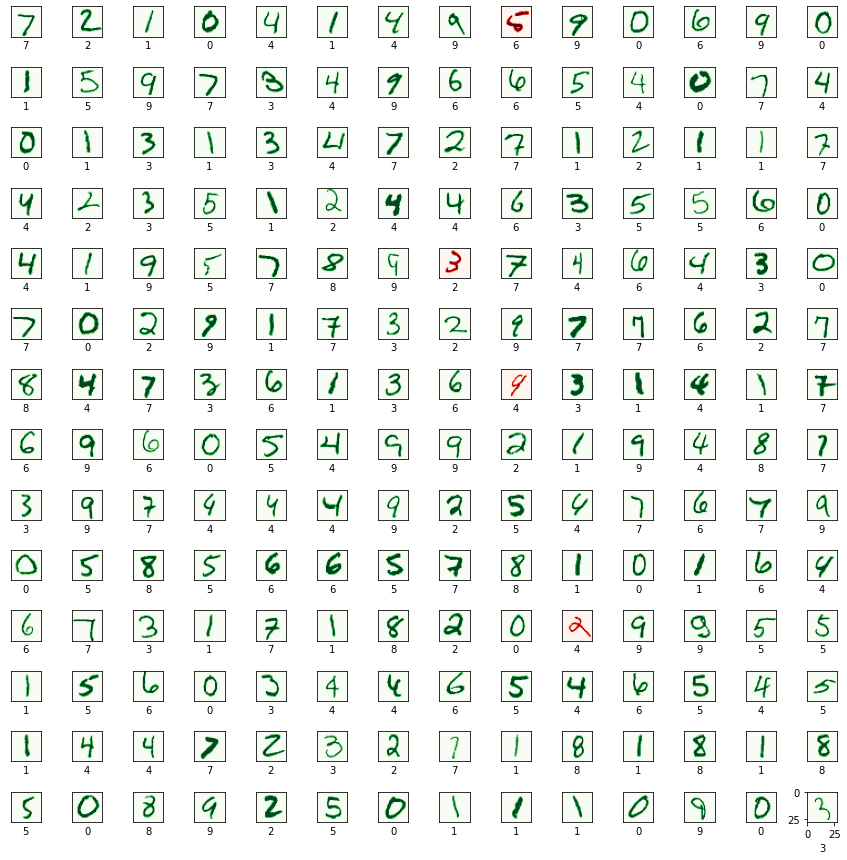

In [32]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix


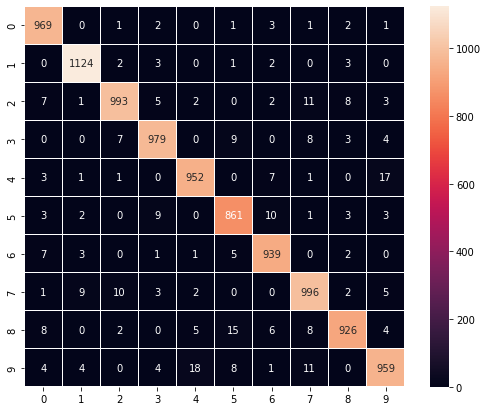

In [33]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()